In [15]:
import torch
import os
from torch.utils.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

from torch.nn import ConvTranspose2d
from torch.nn import Conv2d
from torch.nn import MaxPool2d
from torch.nn import Module
from torch.nn import ModuleList
from torch.nn import ReLU
from torchvision.transforms import CenterCrop
from torch.nn import functional as F
import torch.nn as nn

import pprint




In [16]:
# determine the device to be used for training and evaluation
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

subdir = ["benign_image/", "benign_mask/", "malignant_image/","malignant_mask/", "normal_image/", "normal_mask/"]
dataset = ['dataset/','train/', 'test/', 'validation/']

train_test_valid = [[[], [], []], [[], [], []], [[], [], []]]

for i in range(1, len(dataset)):
	for j in range(3):
	# for j in range(2):
		for k in range(len(os.listdir(dataset[0]+dataset[i]+subdir[j*2]))):
			train_test_valid[i-1][0].append(plt.imread(
				dataset[0]+dataset[i]+subdir[j*2]+str(k)+".jpeg"))
			train_test_valid[i-1][1].append(plt.imread(
				dataset[0]+dataset[i]+subdir[j*2+1]+str(k)+".jpeg"))
			train_test_valid[i-1][2].append(j)

X_train_npy = np.asarray(train_test_valid[0][0], dtype=np.float32)/255
y_train_npy = np.asarray(train_test_valid[0][1], dtype=np.float32)/255

X_test_npy = np.asarray(train_test_valid[1][0], dtype=np.float32)/255
y_test_npy = np.asarray(train_test_valid[1][1], dtype=np.float32)/255

X_valid_npy = np.asarray(train_test_valid[2][0], dtype=np.float32)/255
y_valid_npy = np.asarray(train_test_valid[2][1], dtype=np.float32)/255

class SegmentationDataset(Dataset):

	def __init__(self, X, y, transforms):
		self.X = X
		self.y = y
		self.transforms = transforms

	def __len__(self):
		return len(self.y)

	def __getitem__(self, idx):
		
		image = self.X[idx]
		mask = self.y[idx]
  
		if self.transforms is not None:
			image = self.transforms(image)
			mask = self.transforms(mask)
   
		# return a tuple of the image and its mask
		return (image, mask)

In [17]:
def SegregateData(dataset, subdir):

    l = [
            [
                [[], [], []],
                [[], [], []],
                [[], [], []],
            ], 
            [
                [[], [], []],
                [[], [], []],
                [[], [], []],
            ],
            [
                [[], [], []],
                [[], [], []],
                [[], [], []],
            ],
        ]

    for i in range(1, 4):
        for k in range(3):
            dir_l = os.listdir(dataset[0]+dataset[i]+subdir[k*2])
            dir_l2 = os.listdir(dataset[0]+dataset[i]+subdir[k*2+1])

            l1 = []
            for j in range(len(dir_l)):
                l1.append(plt.imread(dataset[0]+dataset[i]+subdir[k*2]+dir_l[j]))
            
            l2 = []
            for j in range(len(dir_l2)):
                l2.append(plt.imread(dataset[0]+dataset[i]+subdir[k*2+1]+dir_l2[j]))

            l3=[]
            for j in range(len(dir_l2)):
                q=[0,0,0]
                q[k]=1
                l3.append(q)

            l[i-1][k][0] = np.asarray(l1, dtype=np.float32)/255
            l[i-1][k][1] = np.asarray(l2, dtype=np.float32)/255
            l[i-1][k][2] = l3

    return l

l = SegregateData(dataset, subdir)

In [18]:
import seaborn as sns

In [19]:
import pandas as pd

<AxesSubplot:ylabel='Count'>

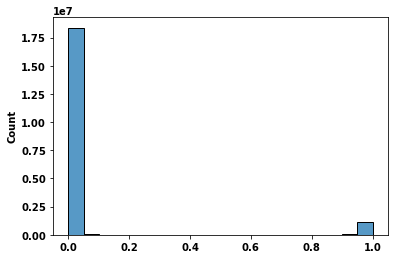

In [20]:
sns.histplot(l[0][0][1].flatten(),binrange=[0,1],binwidth=0.05)

<AxesSubplot:ylabel='Count'>

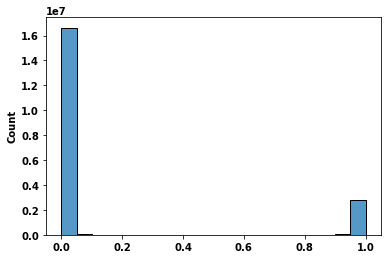

In [21]:
sns.histplot(l[0][1][1].flatten(),binrange=[0,1],binwidth=0.05)

<AxesSubplot:ylabel='Count'>

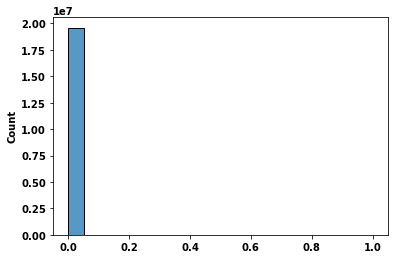

In [22]:
sns.histplot(l[0][2][1].flatten(),binrange=[0,1],binwidth=0.05)

<AxesSubplot:ylabel='Count'>

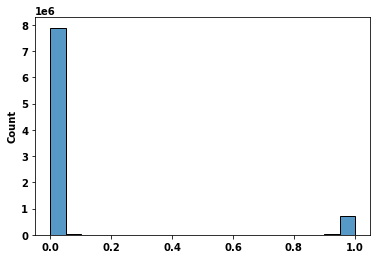

In [23]:
sns.histplot(l[1][0][1].flatten(),binrange=[0,1],binwidth=0.05)

<AxesSubplot:ylabel='Count'>

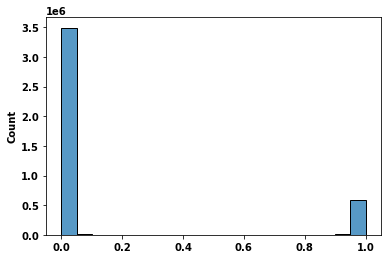

In [24]:
sns.histplot(l[1][1][1].flatten(),binrange=[0,1],binwidth=0.05)

<AxesSubplot:ylabel='Count'>

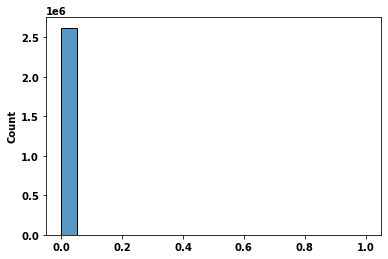

In [25]:
sns.histplot(l[1][2][1].flatten(),binrange=[0,1],binwidth=0.05)

<AxesSubplot:ylabel='Count'>

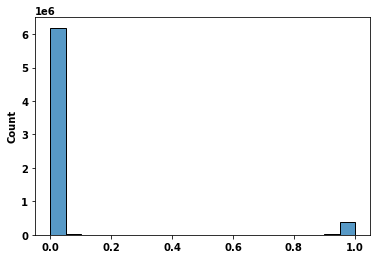

In [26]:
sns.histplot(l[2][0][1].flatten(),binrange=[0,1],binwidth=0.05)

<AxesSubplot:ylabel='Count'>

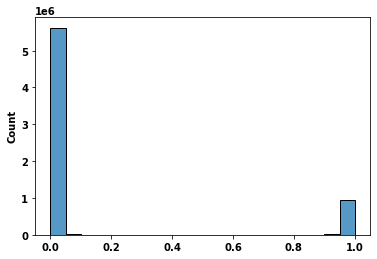

In [27]:
sns.histplot(l[2][1][1].flatten(),binrange=[0,1],binwidth=0.05)

<AxesSubplot:ylabel='Count'>

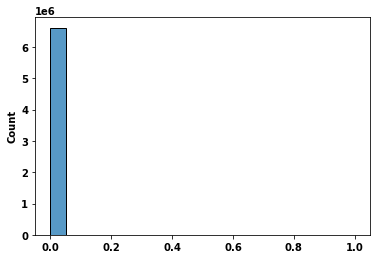

In [28]:
sns.histplot(l[2][2][1].flatten(),binrange=[0,1],binwidth=0.05)